In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

W oryginalnych danych sporo jest takich samych obserwacji. zakładmy, że to są przypadki, gdzie leczenie nie pomogło i osoba zmarła.

Tam gdzie są obserwacje 'prawie' takie same, to znaczy różnią się tylko zmienną 'time', zakładamy, że to są przypadki, że po tym czasie nastąpił nawrót choroby i potem osoba zmarła. 

Moment otrzymania leku uważamy jako time = 0 , czas który minął w zmiennej time, to czas do śmirci lub nawrotu choroby od otrzymania leku.

In [4]:
data = pd.read_csv('survival.csv', index_col = 0)
data.head(20)

,id,study,rx,sex,age,obstruct,perfor,adhere,nodes,status,differ,extent,surg,node4,time,etype
1,1,1,Lev+5FU,1,43,0,0,0,5.0,1,2.0,3,0,1,1521,2
2,1,1,Lev+5FU,1,43,0,0,0,5.0,1,2.0,3,0,1,968,1
3,2,1,Lev+5FU,1,63,0,0,0,1.0,0,2.0,3,0,0,3087,2
4,2,1,Lev+5FU,1,63,0,0,0,1.0,0,2.0,3,0,0,3087,1
5,3,1,Obs,0,71,0,0,1,7.0,1,2.0,2,0,1,963,2
6,3,1,Obs,0,71,0,0,1,7.0,1,2.0,2,0,1,542,1
7,4,1,Lev+5FU,0,66,1,0,0,6.0,1,2.0,3,1,1,293,2
8,4,1,Lev+5FU,0,66,1,0,0,6.0,1,2.0,3,1,1,245,1
9,5,1,Obs,1,69,0,0,0,22.0,1,2.0,3,1,1,659,2
10,5,1,Obs,1,69,0,0,0,22.0,1,2.0,3,1,1,523,1


In [6]:
data.set_index('id', inplace = True)

In [34]:

data.head()

,study,rx,sex,age,obstruct,perfor,adhere,nodes,status,differ,extent,surg,node4,time,etype,time_death,time_recc
id,,,,,,,,,,,,,,,,,
1,1,Lev+5FU,1,43,0,0,0,5.0,1,2.0,3,0,1,1521,2,1521,968
1,1,Lev+5FU,1,43,0,0,0,5.0,1,2.0,3,0,1,968,1,0,968
2,1,Lev+5FU,1,63,0,0,0,1.0,0,2.0,3,0,0,3087,2,3087,0
2,1,Lev+5FU,1,63,0,0,0,1.0,0,2.0,3,0,0,3087,1,0,0
3,1,Obs,0,71,0,0,1,7.0,1,2.0,2,0,1,963,2,963,542


In [35]:
df = data.copy()

In [29]:
data['time_death'] = np.where(data['etype']==2, data['time'], 0)

In [31]:
data['time_recc'] = 0

In [33]:
for idx in df.index.values:
    time_val = data.loc[idx, 'time'].values
    if time_val[0]==time_val[1]:
        data.loc[idx, 'time_recc']=0
    else:
        data.loc[idx, 'time_recc']=time_val[1]

In [40]:
df.drop_duplicates(subset=df.columns.values[:-4], inplace = True)

In [43]:
df.drop(['study','time','etype'], axis =1, inplace = True)
df

,rx,sex,age,obstruct,perfor,adhere,nodes,status,differ,extent,surg,node4,time_death,time_recc
id,,,,,,,,,,,,,,
1,Lev+5FU,1,43,0,0,0,5.0,1,2.0,3,0,1,1521,968
2,Lev+5FU,1,63,0,0,0,1.0,0,2.0,3,0,0,3087,0
3,Obs,0,71,0,0,1,7.0,1,2.0,2,0,1,963,542
4,Lev+5FU,0,66,1,0,0,6.0,1,2.0,3,1,1,293,245
5,Obs,1,69,0,0,0,22.0,1,2.0,3,1,1,659,523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,Lev+5FU,1,71,0,0,1,4.0,0,2.0,3,0,0,1875,0
926,Lev,0,72,0,0,0,1.0,0,2.0,3,0,0,2154,0
927,Lev,1,76,0,0,1,1.0,1,3.0,3,0,0,1018,851


In [46]:
df['target'] = np.where(df['time_recc']==0, 0, 1)

In [47]:
df

,rx,sex,age,obstruct,perfor,adhere,nodes,status,differ,extent,surg,node4,time_death,time_recc,target
id,,,,,,,,,,,,,,,
1,Lev+5FU,1,43,0,0,0,5.0,1,2.0,3,0,1,1521,968,1
2,Lev+5FU,1,63,0,0,0,1.0,0,2.0,3,0,0,3087,0,0
3,Obs,0,71,0,0,1,7.0,1,2.0,2,0,1,963,542,1
4,Lev+5FU,0,66,1,0,0,6.0,1,2.0,3,1,1,293,245,1
5,Obs,1,69,0,0,0,22.0,1,2.0,3,1,1,659,523,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,Lev+5FU,1,71,0,0,1,4.0,0,2.0,3,0,0,1875,0,0
926,Lev,0,72,0,0,0,1.0,0,2.0,3,0,0,2154,0,0
927,Lev,1,76,0,0,1,1.0,1,3.0,3,0,0,1018,851,1


In [57]:
df.describe().loc[['mean','std', 'min','50%','max']].T

,mean,std,min,50%,max
sex,0.514911,0.500026,0.0,1.0,1.0
age,59.919483,11.982345,18.0,61.0,85.0
obstruct,0.196819,0.397792,0.0,0.0,1.0
perfor,0.028827,0.167403,0.0,0.0,1.0
adhere,0.148111,0.355387,0.0,0.0,1.0
nodes,3.650456,3.563166,0.0,2.0,33.0
status,0.496024,0.500233,0.0,0.0,1.0
differ,2.064155,0.507797,1.0,2.0,3.0
extent,2.889662,0.497509,1.0,3.0,4.0
surg,0.275348,0.446912,0.0,0.0,1.0


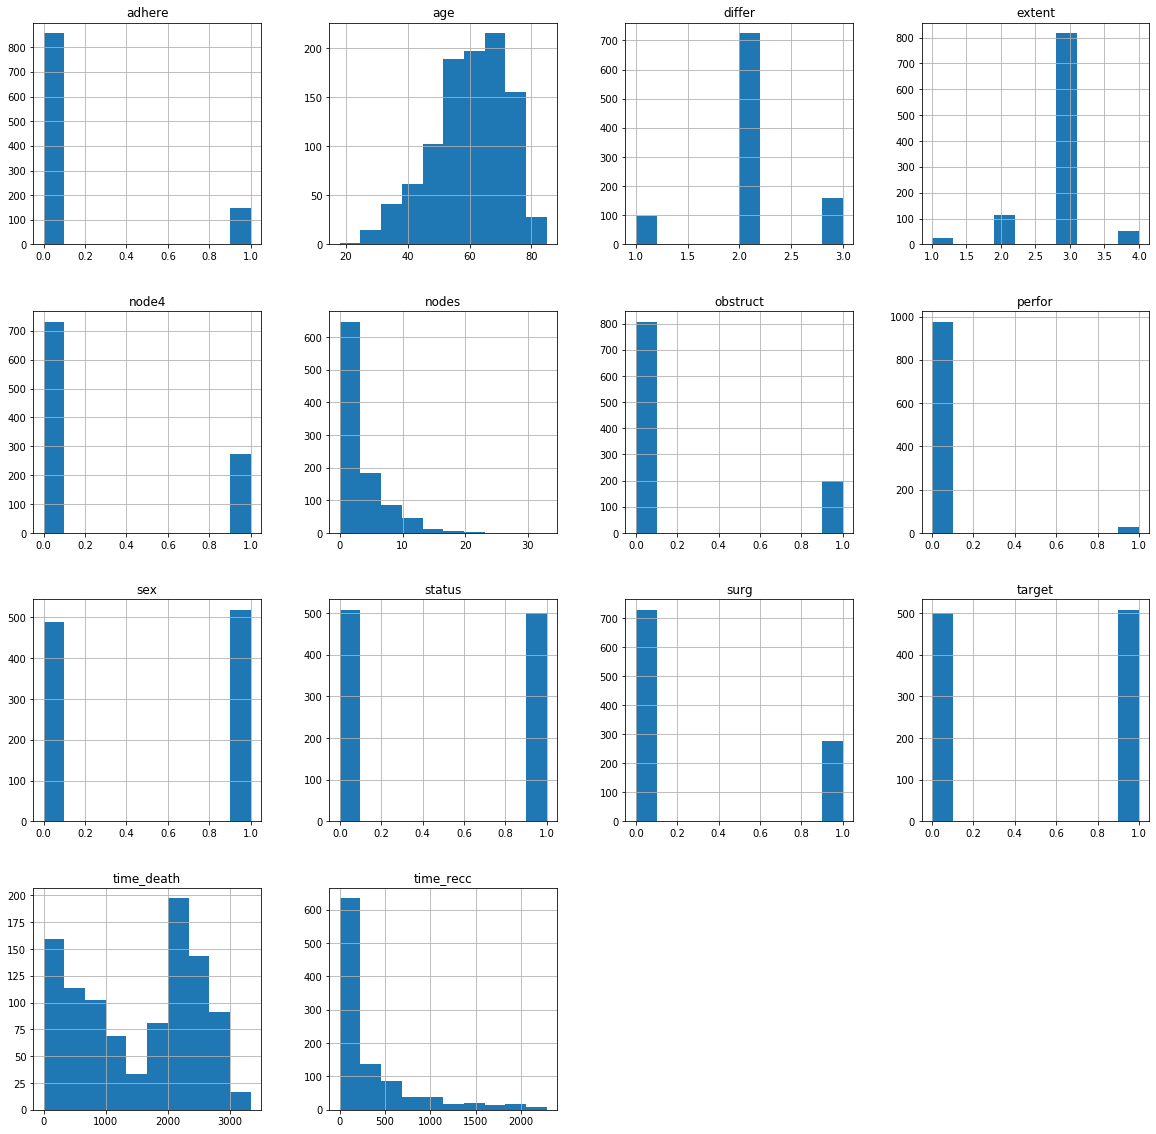

In [58]:
df.hist(figsize=(20,20))
plt.show()

In [62]:
df.groupby(['rx','sex','target']).age.agg(['count'])

count
rx      sex target       
Lev     0   0          63
            1          85
        1   0          86
            1         104
Lev+5FU 0   0          99
            1          79
        1   0         100
            1          46
Obs     0   0          74
            1          88
        1   0          77
            1         105

In [63]:
df.to_csv('survival_clean.csv')